In [300]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [309]:
dfx = pd.read_csv('Train.csv')
x1 = dfx['feature_1'].values
x2 = dfx['feature_2'].values
x3 = dfx['feature_3'].values
x4 = dfx['feature_4'].values
x5 = dfx['feature_5'].values

x6 = np.ones((x5.shape[0],))

x = np.vstack((x1,x2,x3,x4,x5,x6))
print(x.shape)
y = dfx['target'].values.reshape((-1))



(6, 1600)


In [311]:
def hypothesis(x,theta):
    return np.dot(theta,x)

In [312]:
def error(x,y,theta):
    
    error = 0
    for i in range(x.shape[1]):
        X = x[:,i]
        
        error += (hypothesis(X,theta)-y[i])**2
        
    return error/(x.shape[1]*2)

In [314]:
def gradient(x,y,theta):
    grad = np.zeros((x.shape[0]))
    
    for i in range(x.shape[1]):
        
        X = x[:,i]
        
        for j in range(6):
            
            grad[j] += (hypothesis(X,theta)-y[i])*x[j][i]
            
    for i in range(6):
        
        grad[i] /=x.shape[1]
        
    return grad

In [327]:
def gradientdescentalgo(x,y,learning_rate = 0.1):
    error_list = []
    theta_list = []
    theta = np.zeros((6,))
    
    for i in range(100):
        err = error(x,y,theta)
        gra = gradient(x,y,theta)
        
        for j in range(6):
            
            theta[j] -=learning_rate*gra[j]
        
        error_list.append(err)
        theta_list.append(theta)
        
    return error_list,theta_list,theta

In [328]:
err,final_list,t = gradientdescentalgo(x,y)

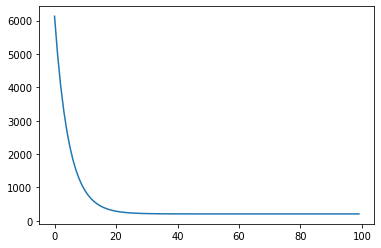

In [329]:
plt.plot(err)

In [365]:
dfx1 = pd.read_csv('Test.csv')
x11 = dfx1['feature_1']
x22 = dfx1['feature_2']
x33 = dfx1['feature_3']
x44 = dfx1['feature_4']
x55 = dfx1['feature_5']

x66 = np.ones((x5.shape[0],1))
print(x66.shape)
x77 = np.vstack((x1,x2,x3,x4,x5,x6))




(1600, 1)


In [353]:
y1 = hypothesis(x77,final_list)
print(y1)

[[ -57.87256821  -89.45778007   53.94992074 ... -115.66023345
   -64.27953468 -116.1113846 ]
 [ -57.87256821  -89.45778007   53.94992074 ... -115.66023345
   -64.27953468 -116.1113846 ]
 [ -57.87256821  -89.45778007   53.94992074 ... -115.66023345
   -64.27953468 -116.1113846 ]
 ...
 [ -57.87256821  -89.45778007   53.94992074 ... -115.66023345
   -64.27953468 -116.1113846 ]
 [ -57.87256821  -89.45778007   53.94992074 ... -115.66023345
   -64.27953468 -116.1113846 ]
 [ -57.87256821  -89.45778007   53.94992074 ... -115.66023345
   -64.27953468 -116.1113846 ]]
